In [3]:
import pandas as pd

In [4]:
cities = ['AV', 'C', 'D', 'G', 'M', 'Y']

data_dict = {}
for c in cities:
    excel_data = pd.read_excel(f'../data/Cimento/203/EMBRAPII hubIC IACC_CIMENTO_{c}.xlsx', sheet_name=None, header=[0,1,2,3,4])
    list_of_dfs = []
    for key, data in excel_data.items():
        if data.empty:
            continue
        if key != 'INSTRUÇÕES':
            data['CodCimento'] = key
            list_of_dfs.append(data)
    data_dict[c] = pd.concat(list_of_dfs)

# AV203 = pd.read_excel('../data/Cimento/203/EMBRAPII hubIC IACC_CIMENTO_AV.xlsx', sheet_name=None, header=[0,1,2,3,4])


In [6]:
cement_data203 = pd.concat(data_dict.values())

In [7]:
cement_data203 = cement_data203.dropna(how='all',axis=1)

In [8]:
cement_data203.columns = ['_'.join(col).strip() for col in cement_data203.columns.values]
cement_data203.columns


Index(['Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Unidade_Método',
       'Dados iniciais_Cidade_Unnamed: 1_level_2_-_Unnamed: 1_level_4',
       'Dados iniciais_Data_Produção_dd/mm/yyyy_Manual',
       'Dados iniciais_Data_Medida_dd/mm/yyyy_Manual',
       'Dados iniciais_Tipo de cimento_Unnamed: 6_level_2_-_Manual',
       'Dados iniciais_Classe de resistência_Unnamed: 7_level_2_-_Manual',
       'Dados iniciais_Obs._Unnamed: 8_level_2_-_Unnamed: 8_level_4',
       'Cimento_Análise química_CaO_%_FRX',
       'Cimento_Análise química_MgO_%_FRX',
       'Cimento_Análise química_Na2O_%_FRX',
       'Cimento_Análise química_Al2O3_%_FRX',
       'Cimento_Análise química_SiO2_%_FRX',
       'Cimento_Análise química_SO3_%_FRX',
       'Cimento_Análise química_K2O_%_FRX',
       'Cimento_Análise química_TiO2_%_FRX',
       'Cimento_Análise química_Fe2O3_%_FRX',
       'Cimento_Análise química_Perda ao fogo_%_Grav',
       'Cimento_Análise química_Resíduo insolúvel_%_NBR NM15',

In [9]:
cement_data203.columns = ['index',
       'Cidade',
       'Data_Produção',
       'Data_Medida',
       'Tipo de cimento',
       'Classe de resistência',
       'Dados iniciais_Obs',
       'CaO',
       'MgO',
       'Na2O',
       'Al2O3',
       'SiO2',
       'SO3',
       'K2O',
       'TiO2',
       'Fe2O3',
       'Perda ao fogo',
       'Resíduo insolúvel',
       'Blaine',
       '#200',
       '#325',
       'Massa específica',
       'Tempo de pega_Inicio',
       'Tempo de pega_Fim',
       'RC1',
       'RC3',
       'RC7',
       'RC28',
       'CodCimento']

Drop all rows with null values on RC1, RC3, etc...

In [10]:
cement_data203 = cement_data203.dropna(how='all', subset=cement_data203.columns[1:-1],axis=0)
cement_data203 = cement_data203.dropna(how='all', subset=['RC28'],axis=0)

In [11]:
cement_data203 = cement_data203.reset_index(drop=True)

In [12]:
cement_data203.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18614 entries, 0 to 18613
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  18148 non-null  float64
 1   Cidade                 18614 non-null  object 
 2   Data_Produção          18614 non-null  object 
 3   Data_Medida            18614 non-null  object 
 4   Tipo de cimento        17876 non-null  object 
 5   Classe de resistência  17876 non-null  object 
 6   Dados iniciais_Obs     3046 non-null   object 
 7   CaO                    7612 non-null   float64
 8   MgO                    18478 non-null  object 
 9   Na2O                   18420 non-null  object 
 10  Al2O3                  7614 non-null   float64
 11  SiO2                   7614 non-null   float64
 12  SO3                    18471 non-null  object 
 13  K2O                    17817 non-null  object 
 14  TiO2                   2797 non-null   float64
 15  Fe

In [13]:
numerical_cols = [ 'CaO',
       'MgO',
       'Na2O',
       'Al2O3',
       'SiO2',
       'SO3',
       'K2O',
       'TiO2',
       'Fe2O3',
       'Perda ao fogo',
       'Resíduo insolúvel',
       'Blaine',
       '#200',
       '#325',
       'Massa específica',
       'Tempo de pega_Inicio',
       'Tempo de pega_Fim',
       'RC1',
       'RC3',
       'RC7',
       'RC28']

In [14]:
cement_data203

,index,Cidade,Data_Produção,Data_Medida,Tipo de cimento,Classe de resistência,Dados iniciais_Obs,CaO,MgO,Na2O,...,#200,#325,Massa específica,Tempo de pega_Inicio,Tempo de pega_Fim,RC1,RC3,RC7,RC28,CodCimento
0,1.0,AV,2018-02-07 14:00:00,2018-02-07 14:00:00,CP II-E,40,NaN,58.63,1.54,0.05,...,0.11,1.17,NaN,170.0,210.0,18.1,30.40,38.23,47.8,122
1,2.0,AV,2018-02-14 14:00:00,2018-02-14 14:00:00,CP II-E,40,NaN,58.59,1.5,0.04,...,0.05,1.06,NaN,165.0,205.0,20.05,30.78,39.3,52.28,122
2,3.0,AV,2018-02-15 16:00:00,2018-02-15 16:00:00,CP II-E,40,NaN,58.90,1.62,0.06,...,0.11,1.06,NaN,165.0,190.0,17.63,30.45,40.05,48.15,122
3,4.0,AV,2018-02-16 14:00:00,2018-02-16 14:00:00,CP II-E,40,NaN,58.65,1.59,0.05,...,0.11,1.38,NaN,175.0,205.0,17.4,30.15,38.35,47.9,122
4,5.0,AV,2018-02-19 13:00:00,2018-02-19 13:00:00,CP II-E,40,NaN,58.74,1.63,0.07,...,0.11,1.27,NaN,165.0,195.0,17.15,29.25,36.98,48.0,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,710.0,Y,2023-03-11 00:00:00,2023-03-11 00:00:00,NaN,NaN,Fibrocimento,64.05,2.0,0.17,...,0.3,3.5,3.08,175.0,225.0,21.9,31.60,36.6,45.1,113
18610,712.0,Y,2023-03-14 00:00:00,2023-03-14 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.2,2.8,3.08,160.0,210.0,19.3,30.50,37.0,44.1,113
18611,716.0,Y,2023-03-18 00:00:00,2023-03-18 00:00:00,NaN,NaN,Fibrocimento,65.03,2.25,0.1,...,0.3,3.8,3.08,165.0,220.0,20.4,30.50,36.5,43.5,113
18612,718.0,Y,2023-03-21 00:00:00,2023-03-21 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.2,2.8,3.08,160.0,225.0,22.6,30.60,39.0,44.0,113


In [15]:
for col in numerical_cols:
    cement_data203[col] = cement_data203[col].astype(str).str.replace(r'(\.0?$)', '', regex=True).str.replace(',,','.').str.replace(',','.').str.replace(r"(\s$)|(-$)", 'nan', regex=True).str.replace(' *', '').astype(float)

In [16]:
cement_data203.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18614 entries, 0 to 18613
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  18148 non-null  float64
 1   Cidade                 18614 non-null  object 
 2   Data_Produção          18614 non-null  object 
 3   Data_Medida            18614 non-null  object 
 4   Tipo de cimento        17876 non-null  object 
 5   Classe de resistência  17876 non-null  object 
 6   Dados iniciais_Obs     3046 non-null   object 
 7   CaO                    7612 non-null   float64
 8   MgO                    18478 non-null  float64
 9   Na2O                   18412 non-null  float64
 10  Al2O3                  7614 non-null   float64
 11  SiO2                   7614 non-null   float64
 12  SO3                    18471 non-null  float64
 13  K2O                    17817 non-null  float64
 14  TiO2                   2797 non-null   float64
 15  Fe

In [17]:
cement_data203_proper = cement_data203.iloc[:,7:]
cement_data203_proper.describe(include='all')

,CaO,MgO,Na2O,Al2O3,SiO2,SO3,K2O,TiO2,Fe2O3,Perda ao fogo,...,#200,#325,Massa específica,Tempo de pega_Inicio,Tempo de pega_Fim,RC1,RC3,RC7,RC28,CodCimento
count,7612.000000,18478.000000,18412.000000,7614.000000,7614.000000,18471.000000,17817.000000,2797.000000,7597.000000,18490.000000,...,17182.000000,18412.000000,6801.000000,18586.000000,18173.000000,18613.000000,14519.000000,18601.000000,18614.000000,18614
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1665
mean,56.897249,2.125861,0.097755,5.882780,21.871258,2.811053,0.919752,0.231391,2.590745,5.009188,...,0.649593,3.880673,3.090684,172.901593,226.206837,18.913268,29.301934,36.655286,46.464623,NaN
std,4.674544,1.026544,0.113338,1.109557,3.929865,0.613628,0.362753,0.069434,0.844700,1.956308,...,0.948614,4.272891,3.734798,30.955555,35.018666,7.566458,8.797197,8.490622,7.672618,NaN
min,44.400000,0.420000,-0.090000,3.800000,8.370000,0.000000,0.016000,0.000000,1.160000,0.460000,...,0.000000,0.000000,2.830000,0.000000,2.350000,3.200000,10.300000,16.700000,28.400000,NaN
25%,52.600000,1.570000,0.050000,4.970000,18.810000,2.380000,0.700000,0.220000,2.240000,3.670000,...,0.060000,0.900000,3.000000,154.000000,205.000000,12.300000,21.830000,29.400000,39.335000,NaN
50%,57.960000,2.060000,0.070000,5.670000,20.755000,2.790000,0.910000,0.240000,2.620000,4.860000,...,0.210000,2.180000,3.060000,170.000000,225.000000,19.100000,30.500000,38.600000,47.950000,NaN
75%,61.200000,2.600000,0.100000,6.700000,25.130000,3.200000,1.080000,0.270000,2.880000,5.917500,...,0.950000,5.510000,3.090000,190.000000,248.000000,25.500000,36.200000,42.900000,52.400000,NaN


In [18]:
cement_data203[cement_data203['CaO'].isnull()]

,index,Cidade,Data_Produção,Data_Medida,Tipo de cimento,Classe de resistência,Dados iniciais_Obs,CaO,MgO,Na2O,...,#200,#325,Massa específica,Tempo de pega_Inicio,Tempo de pega_Fim,RC1,RC3,RC7,RC28,CodCimento
2091,588.0,C,2022-01-11 17:02:00,2022-01-11 17:02:00,CP II-E,32,NaN,NaN,2.15,0.92,...,1.90,5.10,NaN,180.0,240.0,11.75,20.62,24.70,33.73,114
3312,374.0,C,2022-05-30 11:25:00,2022-05-30 11:25:00,CP II-E,40,NaN,NaN,2.87,0.02,...,0.80,2.27,NaN,170.0,220.0,17.80,27.40,39.30,46.40,144
3834,57.0,C,2019-09-09 14:05:00,2019-09-09 14:05:00,CP V,ARI,Granel,NaN,NaN,NaN,...,0.00,0.91,NaN,155.0,210.0,25.08,36.60,39.58,45.93,54
3835,58.0,C,2019-09-10 16:44:00,2019-09-10 16:44:00,CP V,ARI,Granel,NaN,NaN,NaN,...,0.00,0.94,NaN,130.0,180.0,30.03,39.20,41.85,48.03,54
4339,1.0,D,2015-08-12 00:00:00,2015-08-12 00:00:00,CP II-F,32,NaN,NaN,1.15,0.02,...,0.97,7.86,3.12,177.0,220.0,19.70,32.80,39.10,49.90,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18369,NaN,Y,2023-03-21 00:00:00,2023-03-21 00:00:00,CP V,ARI,NaN,NaN,NaN,NaN,...,0.10,0.22,3.09,100.0,140.0,25.00,32.10,38.20,45.00,71
18606,700.0,Y,2023-02-28 00:00:00,2023-02-28 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.30,3.40,3.08,180.0,225.0,22.00,32.60,35.30,43.50,113
18607,704.0,Y,2023-03-04 00:00:00,2023-03-04 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.20,2.90,3.08,175.0,230.0,21.10,32.40,37.80,44.10,113
18610,712.0,Y,2023-03-14 00:00:00,2023-03-14 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.20,2.80,3.08,160.0,210.0,19.30,30.50,37.00,44.10,113


In [28]:
cement_data203.to_csv('../data/processed/processed_203.csv')

In [19]:
df = cement_data203
# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()

# Calculate the proportion of missing values in each column
missing_values_proportion = missing_values_count / len(df)

# Combine the counts and proportions into a DataFrame
missing_info = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Proportion': missing_values_proportion
})

print("Missing Values Distribution:")
print(missing_info)

Missing Values Distribution:
                       Missing Values Count  Missing Values Proportion
index                                   466                   0.025035
Cidade                                    0                   0.000000
Data_Produção                             0                   0.000000
Data_Medida                               0                   0.000000
Tipo de cimento                         738                   0.039648
Classe de resistência                   738                   0.039648
Dados iniciais_Obs                    15568                   0.836360
CaO                                   11002                   0.591060
MgO                                     136                   0.007306
Na2O                                    202                   0.010852
Al2O3                                 11000                   0.590953
SiO2                                  11000                   0.590953
SO3                                     143     

In [22]:
df

,index,Cidade,Data_Produção,Data_Medida,Tipo de cimento,Classe de resistência,Dados iniciais_Obs,CaO,MgO,Na2O,...,#200,#325,Massa específica,Tempo de pega_Inicio,Tempo de pega_Fim,RC1,RC3,RC7,RC28,CodCimento
0,1.0,AV,2018-02-07 14:00:00,2018-02-07 14:00:00,CP II-E,40,NaN,58.63,1.54,0.05,...,0.11,1.17,NaN,170.0,210.0,18.10,30.40,38.23,47.80,122
1,2.0,AV,2018-02-14 14:00:00,2018-02-14 14:00:00,CP II-E,40,NaN,58.59,1.50,0.04,...,0.05,1.06,NaN,165.0,205.0,20.05,30.78,39.30,52.28,122
2,3.0,AV,2018-02-15 16:00:00,2018-02-15 16:00:00,CP II-E,40,NaN,58.90,1.62,0.06,...,0.11,1.06,NaN,165.0,190.0,17.63,30.45,40.05,48.15,122
3,4.0,AV,2018-02-16 14:00:00,2018-02-16 14:00:00,CP II-E,40,NaN,58.65,1.59,0.05,...,0.11,1.38,NaN,175.0,205.0,17.40,30.15,38.35,47.90,122
4,5.0,AV,2018-02-19 13:00:00,2018-02-19 13:00:00,CP II-E,40,NaN,58.74,1.63,0.07,...,0.11,1.27,NaN,165.0,195.0,17.15,29.25,36.98,48.00,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18609,710.0,Y,2023-03-11 00:00:00,2023-03-11 00:00:00,NaN,NaN,Fibrocimento,64.05,2.00,0.17,...,0.30,3.50,3.08,175.0,225.0,21.90,31.60,36.60,45.10,113
18610,712.0,Y,2023-03-14 00:00:00,2023-03-14 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.20,2.80,3.08,160.0,210.0,19.30,30.50,37.00,44.10,113
18611,716.0,Y,2023-03-18 00:00:00,2023-03-18 00:00:00,NaN,NaN,Fibrocimento,65.03,2.25,0.10,...,0.30,3.80,3.08,165.0,220.0,20.40,30.50,36.50,43.50,113
18612,718.0,Y,2023-03-21 00:00:00,2023-03-21 00:00:00,NaN,NaN,Fibrocimento,NaN,NaN,NaN,...,0.20,2.80,3.08,160.0,225.0,22.60,30.60,39.00,44.00,113


In [23]:
import missingno as msno

<Axes: >

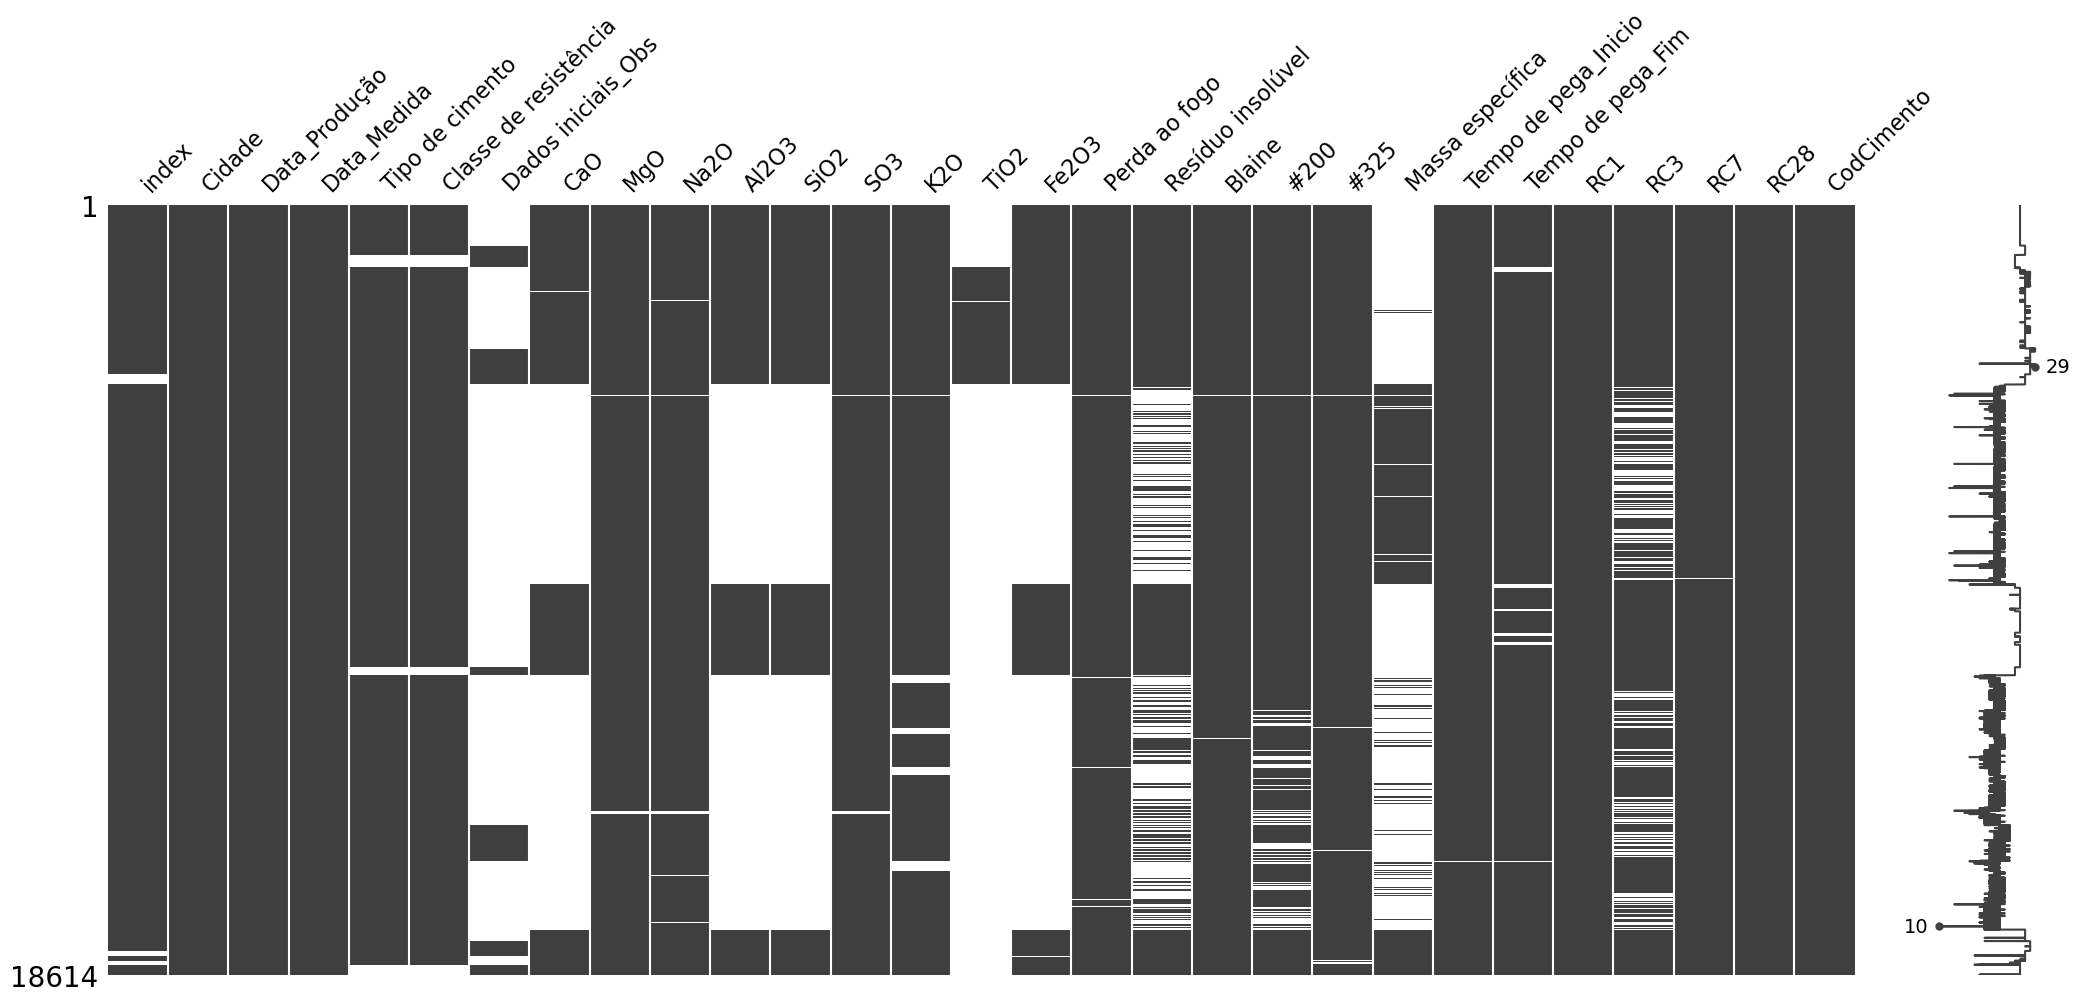

In [24]:
msno.matrix(df)

<Axes: >

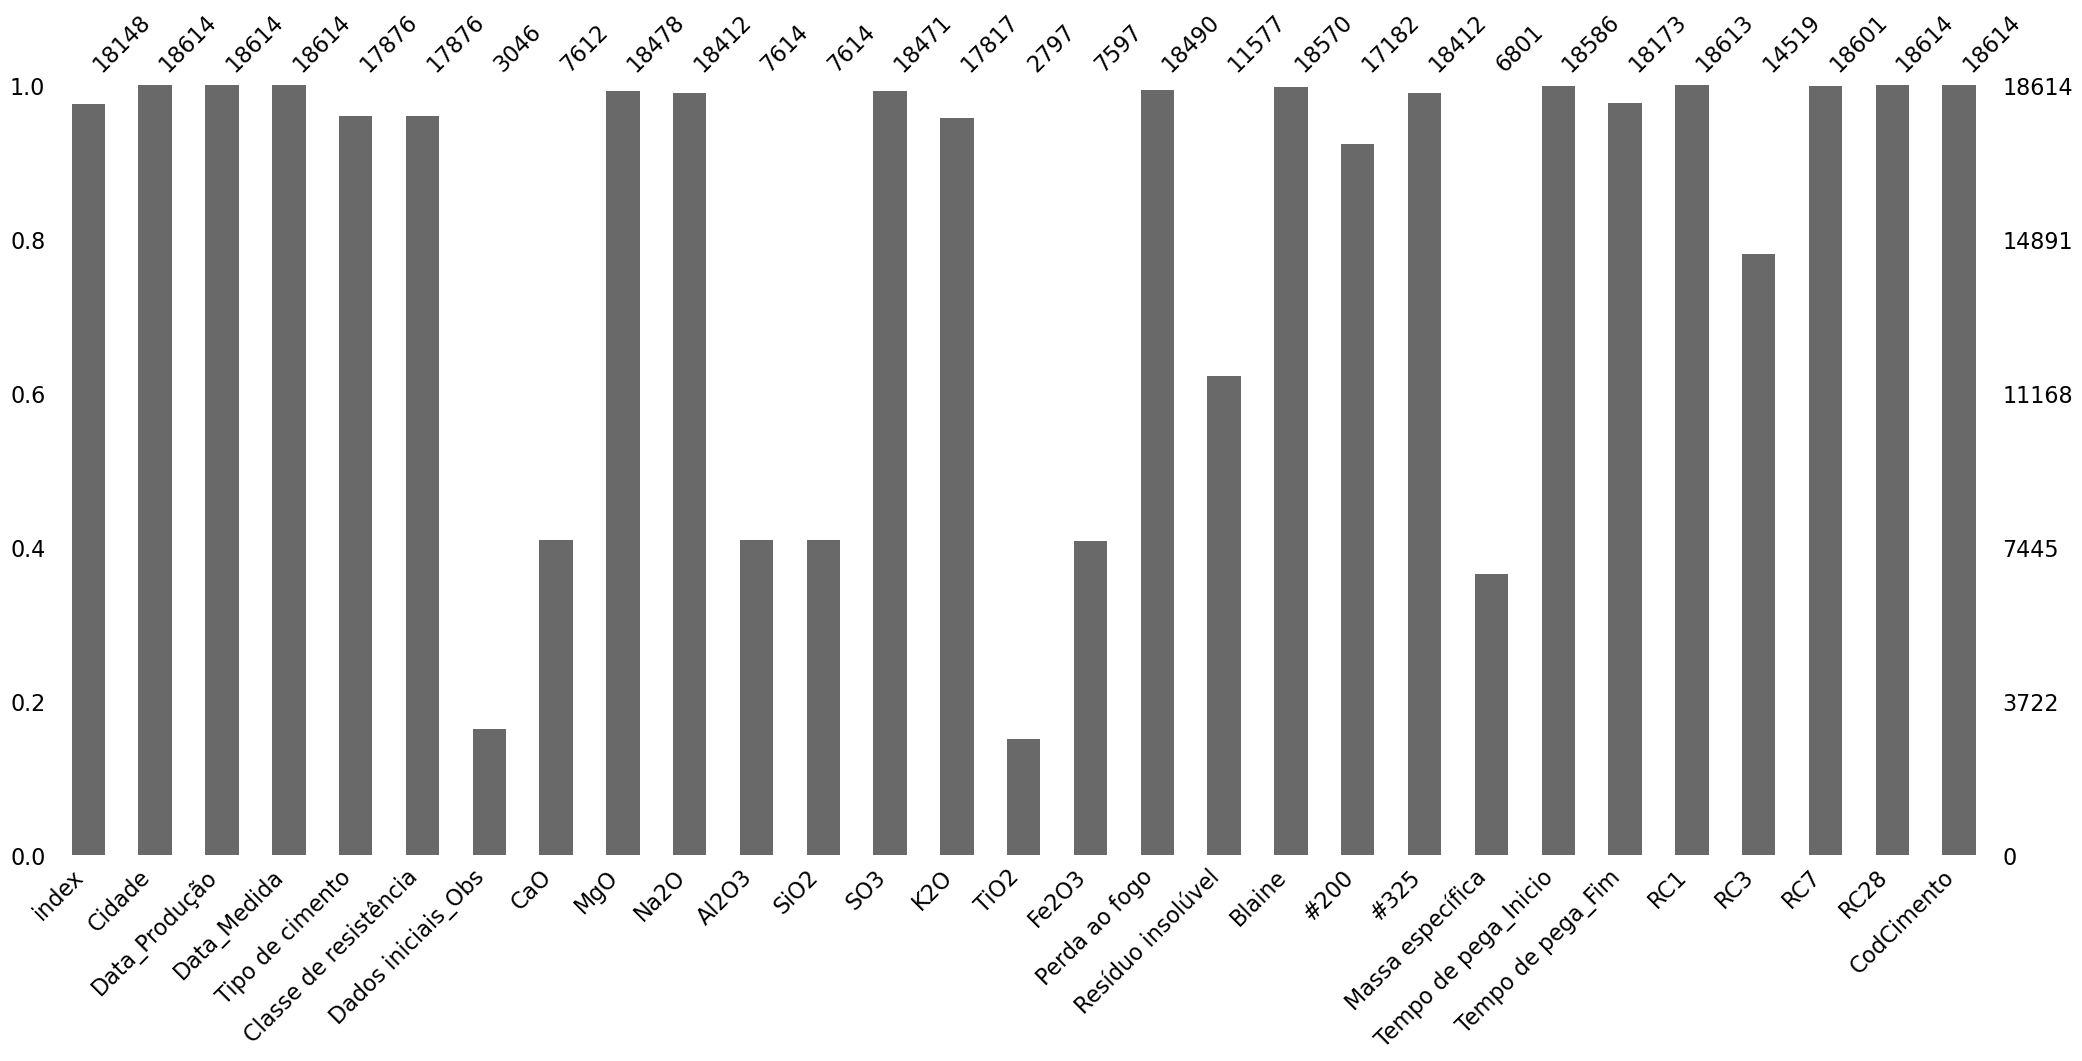

In [25]:
msno.bar(df)

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

Nullity correlation ranges:
- from -1 (if one variable appears the other definitely does not) 
- to 0 (variables appearing or not appearing have no effect on one another)
- to 1 (if one variable appears the other definitely also does).

<Axes: >

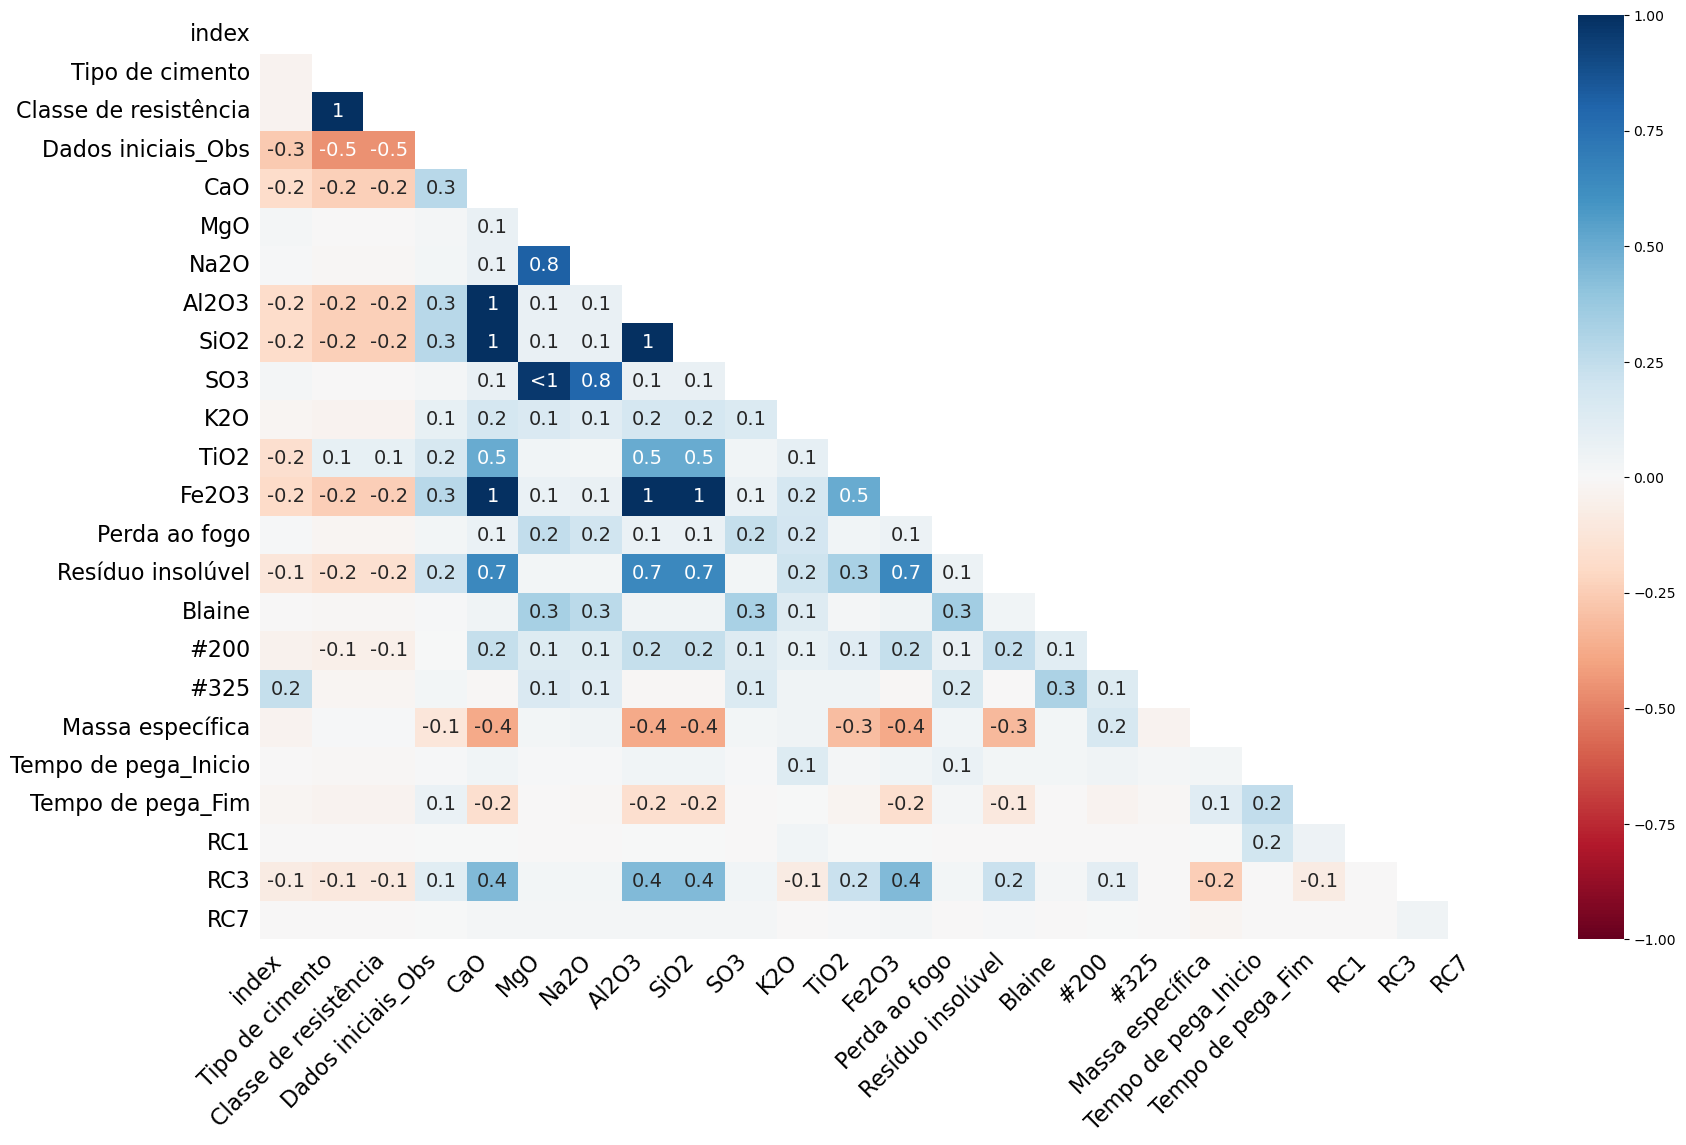

In [26]:
msno.heatmap(df)